<a href="https://colab.research.google.com/github/Anubhavsinghchauhan/Churn_predict_for_car_service_provider_Anubhav/blob/main/sclaer_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd

In [212]:
! gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 124MB/s] 


In [213]:
df=pd.read_csv("scaler_clustering.csv")

In [214]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [216]:
df.shape

(205843, 7)

In [217]:
df.isna().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


let's drop email_hash and Unnamed: 0 as theu are just adding nothing value to our clustering algo they are just unique identifiers.

In [218]:
df.drop(columns=['Unnamed: 0','email_hash'],inplace=True)

In [219]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,NaN,2019.0
205839,husqvawgb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,NaN,2019.0


In [220]:
import re

In [221]:

def getstring(string):
    if not isinstance(string, str):
        return string  # preserve NaN or non-string
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string



In [222]:
df['company_hash'].nunique()

37299

In [223]:
df['company_hash']=df['company_hash'].apply(getstring)

In [224]:
df['company_hash'].nunique()

37207

around 37299 unique company in the dataset

In [225]:
df['job_position'].nunique()

1016

In [226]:
df['job_position']=df['job_position'].apply(getstring)

In [227]:
df['job_position'].nunique()

855

In [228]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,NaN,2019.0
205839,husqvawgb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,NaN,2019.0


In [229]:
df.duplicated().sum()


np.int64(17598)

In [230]:
df.drop_duplicates(inplace=True)


In [231]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,NaN,2019.0
205839,husqvawgb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,NaN,2019.0


In [232]:
df['company_hash'].value_counts().sort_values(ascending=False)

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,4284
xzegojo,3043
vbvkgz,3005
wgszxkvzn,2263
zgn vuurxwvmrt vwwghzn,2208
...,...
ztdnowb xzwqtee,1
yga xzzgcvnxgz rvm ucn rna,1
yjutq nqvwp,1


In [233]:
df.isna().sum()

,0
company_hash,44
orgyear,86
ctc,0
job_position,43513
ctc_updated_year,0


let impute missing value

In [234]:
df['company_hash'].value_counts()

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,4284
xzegojo,3043
vbvkgz,3005
wgszxkvzn,2263
zgn vuurxwvmrt vwwghzn,2208
...,...
tqgo xzntqzvnxgzrv,1
zthqgojzvunxw wgbbhzxwvnxgz ucn rna,1
egqnvzxd xzw,1


since most of the value are there only 44 is missing so let compute it with mode.

In [235]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,188159.000000,1.882450e+05,188245.000000
mean,2014.614523,2.388503e+06,2019.576499
std,66.467192,1.221430e+07,1.343410
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,6.000000e+05,2019.000000
50%,2016.000000,1.000000e+06,2020.000000
75%,2018.000000,1.750000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [236]:
df['company_hash'].fillna(df['company_hash'].mode()[0], inplace=True)


<ipython-input-236-2376881957>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_hash'].fillna(df['company_hash'].mode()[0], inplace=True)


In [237]:
df.isna().sum()

,0
company_hash,0
orgyear,86
ctc,0
job_position,43513
ctc_updated_year,0


In [238]:
df['orgyear'].fillna(df['orgyear'].median(), inplace=True)


<ipython-input-238-4229170127>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['orgyear'].fillna(df['orgyear'].median(), inplace=True)


In [239]:
df.isna().sum()

,0
company_hash,0
orgyear,0
ctc,0
job_position,43513
ctc_updated_year,0


In [240]:
df['job_position'].fillna("others",inplace=True)

<ipython-input-240-3315183368>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_position'].fillna("others",inplace=True)


In [241]:
df.isna().sum()

,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


In [242]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


In [243]:
df['job_position'].value_counts()

,count
job_position,
others,43514
backend engineer,40324
fullstack engineer,24048
other,16184
frontend engineer,10110
...,...
aspnet developer,1
area operations manager,1
risk investigator,1


In [244]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


In [245]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


In [246]:
df.shape

(188245, 5)

In [247]:
df.drop_duplicates(inplace=True)
df.shape

(188226, 5)

In [248]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year'], dtype='object')

In [249]:
import seaborn as sns

In [250]:
top_20 = df['job_position'].value_counts().nlargest(20).index

# Filter the DataFrame to include only those top 20
df_top20 = df[df['job_position'].isin(top_20)]


<Axes: xlabel='count', ylabel='job_position'>

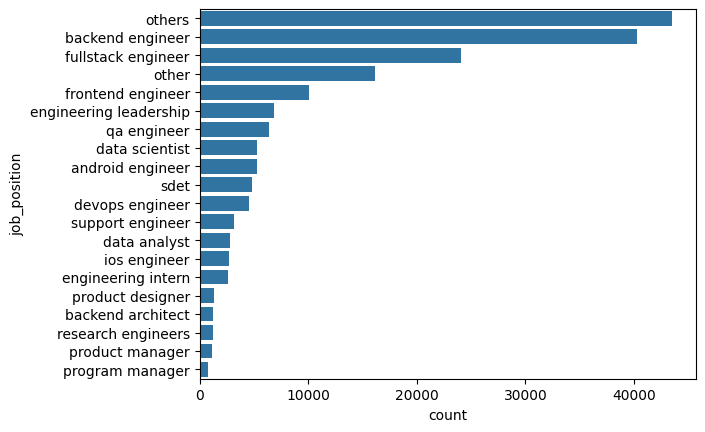

In [251]:
sns.countplot(data=df_top20, y='job_position', order=top_20)

In [252]:
df['company_hash'].value_counts()

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,4311
xzegojo,3043
vbvkgz,3004
wgszxkvzn,2263
zgn vuurxwvmrt vwwghzn,2208
...,...
tqgo xzntqzvnxgzrv,1
zthqgojzvunxw wgbbhzxwvnxgz ucn rna,1
egqnvzxd xzw,1


In [253]:
top_20 = df['company_hash'].value_counts().nlargest(20).index

df_top20 = df[df['company_hash'].isin(top_20)]


<Axes: xlabel='count', ylabel='company_hash'>

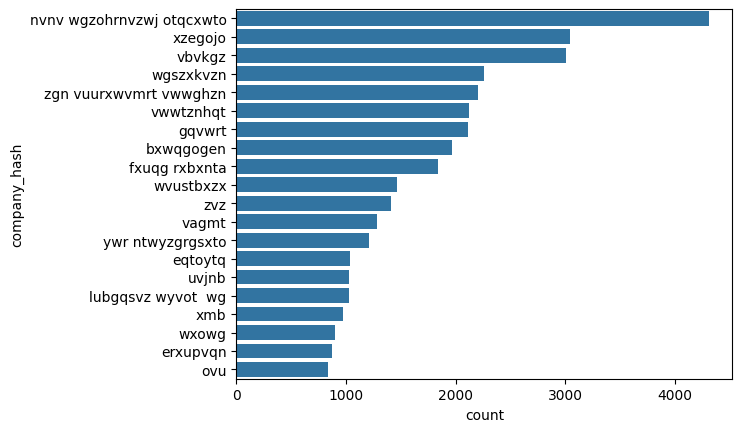

In [254]:
sns.countplot(data=df_top20, y='company_hash', order=top_20)

In [255]:
df


,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


<Axes: xlabel='orgyear'>

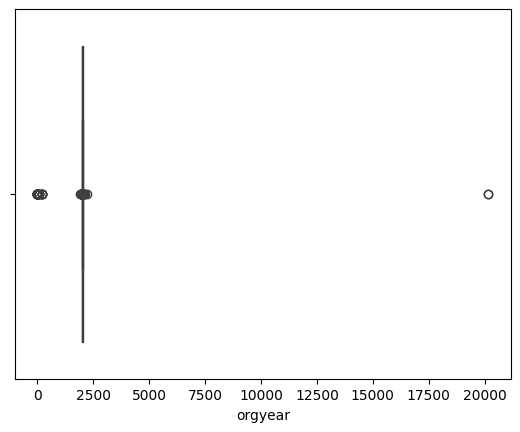

In [256]:
sns.boxplot(x=df['orgyear'])

In [257]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,188226.000000,1.882260e+05,188226.000000
mean,2014.614973,2.388664e+06,2019.576419
std,66.455360,1.221491e+07,1.343430
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,6.000000e+05,2019.000000
50%,2016.000000,1.000000e+06,2020.000000
75%,2018.000000,1.750000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [258]:
df['orgyear'].min()

0.0

alot of ouliers in this let fix it

In [259]:
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))


In [260]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,188226.000000,1.882260e+05,188226.000000
mean,2014.892257,2.388664e+06,2019.576419
std,4.138813,1.221491e+07,1.343430
min,2000.000000,2.000000e+00,2015.000000
25%,2013.000000,6.000000e+05,2019.000000
50%,2016.000000,1.000000e+06,2020.000000
75%,2018.000000,1.750000e+06,2021.000000
max,2021.000000,1.000150e+09,2021.000000


In [261]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


<Axes: xlabel='count', ylabel='orgyear'>

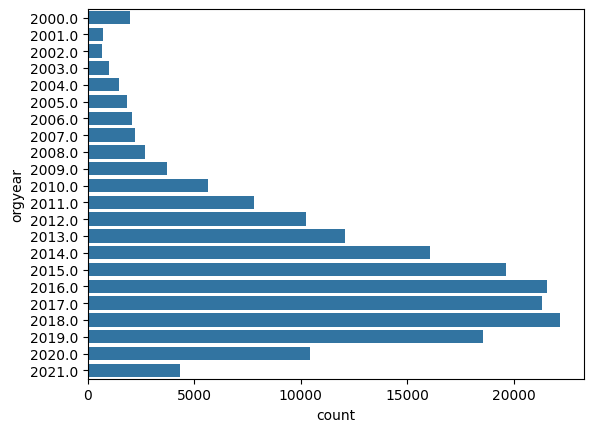

In [262]:
sns.countplot(y=df['orgyear'])

In [263]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0
205839,husqvawgb,2017.0,500000,others,2020.0
205840,vwwgrxnt,2021.0,700000,others,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0


<Axes: xlabel='ctc_updated_year'>

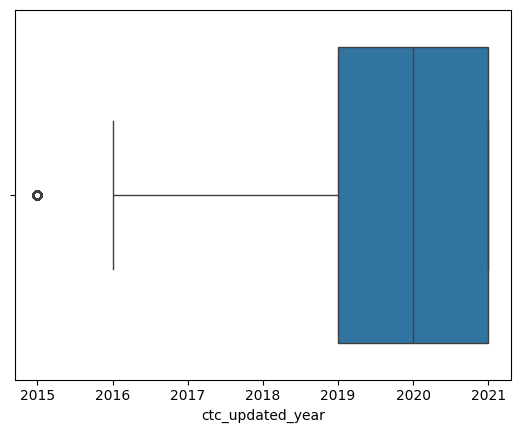

In [264]:
sns.boxplot(x=df['ctc_updated_year'])

Median (middle line) is closer to the right (2020–2021).

The left whisker is longer, with a visible outlier near 2015.

This shows the distribution has a longer tail on the left.



In [265]:
df = df[df['ctc_updated_year'] > 2015]


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185329 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      185329 non-null  object 
 1   orgyear           185329 non-null  float64
 2   ctc               185329 non-null  int64  
 3   job_position      185329 non-null  object 
 4   ctc_updated_year  185329 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.5+ MB


In [267]:
df['experience_year']=2025-df['orgyear']

<ipython-input-267-693457715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_year']=2025-df['orgyear']


In [268]:
df['experience_year'].describe()

,experience_year
count,185329.000000
mean,10.095635
std,4.152617
min,4.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,25.000000


<Axes: xlabel='experience_year'>

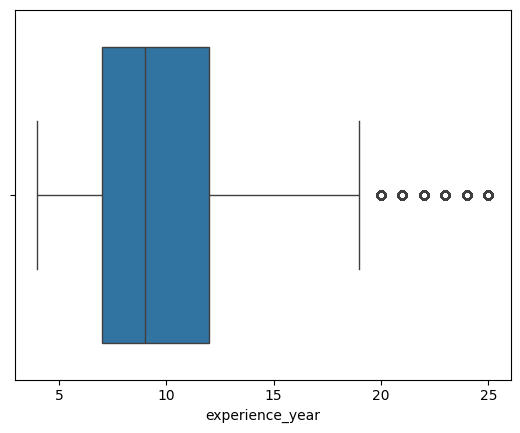

In [269]:
sns.boxplot(x=df['experience_year'])

few outliers lets remove them as kmean++ impact by the oultiers easily .

In [270]:
df = df[df['experience_year'] <20]


<Axes: xlabel='experience_year'>

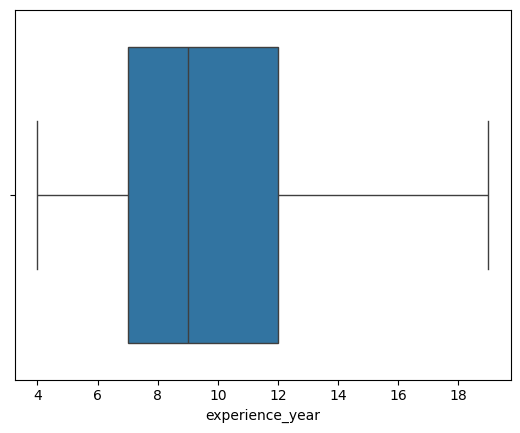

In [271]:
sns.boxplot(x=df['experience_year'])

In [272]:
df.drop_duplicates(inplace=True)
df.shape

(177528, 6)

In [273]:
df['experience_year'].value_counts()

,count
experience_year,
7.0,22040
8.0,20991
9.0,20847
10.0,19216
6.0,18539
11.0,15724
12.0,11759
5.0,10429
13.0,10059


In [274]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0
...,...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,others,2019.0,17.0
205839,husqvawgb,2017.0,500000,others,2020.0,8.0
205840,vwwgrxnt,2021.0,700000,others,2021.0,4.0
205841,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0


In [275]:
grouped_data = df.groupby(['experience_year','job_position','company_hash'])['ctc'].describe()
grouped_data

count  \
experience_year job_position       company_hash                                           
4.0                                ogenfvqt tzsxzttqxzs uqgetooxgzvro               1.0   
                                   zgn vuurxwvmrt vwwghzn                           1.0   
                analyst programmer wgszxkvzn ntwyzgrgsj ogrhnxgzo ho wgqugqvnxgz    1.0   
                android engineer   bghznmrht ntwyzgrgsxto                           1.0   
                                   bgztj cxtf                                       1.0   
...                                                                                 ...   
19.0            support engineer   xzegq                                            1.0   
                                   ywr ntwyzgrgsxto                                 2.0   
                                   zvcwgz                                           1.0   
                                   zvz                                              1.0   
                team lead          utqoxontzn ojontbo                               1.0   

                                                                                       mean  \
experience_year job_position       company_hash                                               
4.0                                ogenfvqt tzsxzttqxzs uqgetooxgzvro              450000.0   
                                   zgn vuurxwvmrt vwwghzn                          500000.0   
                analyst programmer wgszxkvzn ntwyzgrgsj ogrhnxgzo ho wgqugqvnxgz   360000.0   
                android engineer   bghznmrht ntwyzgrgsxto                          350000.0   
                                   bgztj cxtf                                     1900000.0   
...                                                                                     ...   
19.0            support engineer   xzegq                                           900000.0   
                                   ywr ntwyzgrgsxto                                850000.0   
                                   zvcwgz                                          500000.0   
                                   zvz                                             400000.0   
                team lead          utqoxontzn ojontbo                             1600000.0   

                                                                                            std  \
experience_year job_position       company_hash                                                   
4.0                                ogenfvqt tzsxzttqxzs uqgetooxgzvro                       NaN   
                                   zgn vuurxwvmrt vwwghzn                                   NaN   
                analyst programmer wgszxkvzn ntwyzgrgsj ogrhnxgzo ho wgqugqvnxgz            NaN   
                android engineer   bghznmrht ntwyzgrgsxto                                   NaN   
                                   bgztj cxtf                                               NaN   
...                                                                                         ...   
19.0            support engineer   xzegq                                                    NaN   
                                   ywr ntwyzgrgsxto                               494974.746831   
                                   zvcwgz                                                   NaN   
                                   zvz                                                      NaN   
                team lead          utqoxontzn ojontbo                                       NaN   

                                                                                        min  \
experience_year job_position       company_hash                                               
4.0                                ogenfvqt tzsxzttqxzs uqgetooxgzvro              450000.0   
                                   zgn vuurxwvmrt vwwghzn                          500000

In [276]:
df_group=df.merge(grouped_data, on=['experience_year','job_position','company_hash'], how='left')
df_group


,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,1.0,2.000000e+06,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,126.0,4.591977e+06,2.026633e+07,7300.0,385000.0,735000.0,1800000.0,180000000.0


In [277]:
def desg(row):
    a = row['ctc']
    b = row['50%']
    c = row['75%']

    if a < b:
        return 3
    elif b <= a <= c:
        return 2
    else:
        return 1

df_group['designation'] = df_group.apply(desg, axis=1)

In [278]:
df_group

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,1.0,2.000000e+06,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,126.0,4.591977e+06,2.026633e+07,7300.0,385000.0,735000.0,1800000.0,180000000.0,1


In [279]:
g2=df.groupby(['job_position','company_hash'])['ctc'].describe()


In [280]:
g2=df.merge(g2, on=['job_position','company_hash'], how='left')
g2.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,2.0,1085000.00,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,25.0,988199.96,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0


In [281]:
g2['class'] = g2.apply(desg, axis=1)

In [282]:
g2.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_group.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [283]:
g3 = df.groupby(['company_hash'])['ctc'].describe()
g3 = df.merge(g3, on=['company_hash'], how='left')


In [284]:
g3['tier'] = g3.apply(desg, axis=1)

In [285]:
g3.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [286]:
g2

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,class
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,3
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,2
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,1
...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,3
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,3
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,1


In [287]:
df=df_group.merge(g2, on=['company_hash','orgyear','ctc','job_position','experience_year','ctc_updated_year'], how='left')


In [288]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,designation,class
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,3,3
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,2,2
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,2,1
...,...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,2,3
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3,3
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,2,3
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,1,1


In [289]:
df=df.merge(g3, on=['company_hash','orgyear','ctc','job_position','experience_year','ctc_updated_year'], how='left')


In [290]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,designation,class,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,3,3,3
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,2,2,2
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,2,1,1
...,...,...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,2,3,3
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3,3,3
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,2,3,3
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,1,1,1


In [291]:
df.describe()

,orgyear,ctc,ctc_updated_year,experience_year,designation,class,tier
count,177528.000000,1.775280e+05,177528.000000,177528.000000,177528.000000,177528.000000,177528.000000
mean,2015.426941,2.335015e+06,2019.660155,9.573059,2.075239,2.134401,2.180619
std,3.322665,1.231093e+07,1.221240,3.322665,0.625295,0.710974,0.742651
min,2006.000000,2.000000e+00,2016.000000,4.000000,1.000000,1.000000,1.000000
25%,2013.000000,5.750000e+05,2019.000000,7.000000,2.000000,2.000000,2.000000
50%,2016.000000,9.800000e+05,2020.000000,9.000000,2.000000,2.000000,2.000000
75%,2018.000000,1.650000e+06,2021.000000,12.000000,2.000000,3.000000,3.000000
max,2021.000000,1.000150e+09,2021.000000,19.000000,3.000000,3.000000,3.000000


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177528 entries, 0 to 177527
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      177528 non-null  object 
 1   orgyear           177528 non-null  float64
 2   ctc               177528 non-null  int64  
 3   job_position      177528 non-null  object 
 4   ctc_updated_year  177528 non-null  float64
 5   experience_year   177528 non-null  float64
 6   designation       177528 non-null  int64  
 7   class             177528 non-null  int64  
 8   tier              177528 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 12.2+ MB


In [293]:
x=df.drop(columns=['company_hash','job_position'])

In [294]:
x

,orgyear,ctc,ctc_updated_year,experience_year,designation,class,tier
0,2016.0,1100000,2020.0,9.0,2,1,2
1,2018.0,449999,2019.0,7.0,3,3,3
2,2015.0,2000000,2020.0,10.0,2,2,2
3,2017.0,700000,2019.0,8.0,3,3,3
4,2017.0,1400000,2019.0,8.0,2,1,1
...,...,...,...,...,...,...,...
177523,2008.0,220000,2019.0,17.0,2,3,3
177524,2017.0,500000,2020.0,8.0,3,3,3
177525,2021.0,700000,2021.0,4.0,2,3,3
177526,2019.0,5100000,2019.0,6.0,1,1,1


In [295]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)

In [296]:
X_scaled

,orgyear,ctc,ctc_updated_year,experience_year,designation,class,tier
0,0.172470,-0.100319,0.278279,-0.172470,-0.120326,-1.595563,-0.243210
1,0.774398,-0.153118,-0.540563,-0.774398,1.478923,1.217485,1.103322
2,-0.128494,-0.027213,0.278279,0.128494,-0.120326,-0.189039,-0.243210
3,0.473434,-0.132810,-0.540563,-0.473434,1.478923,1.217485,1.103322
4,0.473434,-0.075950,-0.540563,-0.473434,-0.120326,-1.595563,-1.589742
...,...,...,...,...,...,...,...
177523,-2.235242,-0.171800,-0.540563,2.235242,-0.120326,1.217485,1.103322
177524,0.473434,-0.149056,0.278279,-0.473434,1.478923,1.217485,1.103322
177525,1.677290,-0.132810,1.097122,-1.677290,-0.120326,1.217485,1.103322
177526,1.075362,0.224597,-0.540563,-1.075362,-1.719574,-1.595563,-1.589742


due to ram issue lets take small smaple of it.


In [297]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_scaled.sample(500)
Z = sch.linkage(sample, method='ward')



In [298]:
Z

array([[ 23.        , 224.        ,   0.        ,   2.        ],
       [139.        , 374.        ,   0.        ,   2.        ],
       [354.        , 491.        ,   0.        ,   2.        ],
       ...,
       [985.        , 994.        ,  24.45838158, 173.        ],
       [995.        , 996.        ,  33.06116906, 388.        ],
       [987.        , 997.        ,  35.93636912, 500.        ]])

Text(0, 0.5, 'distance')

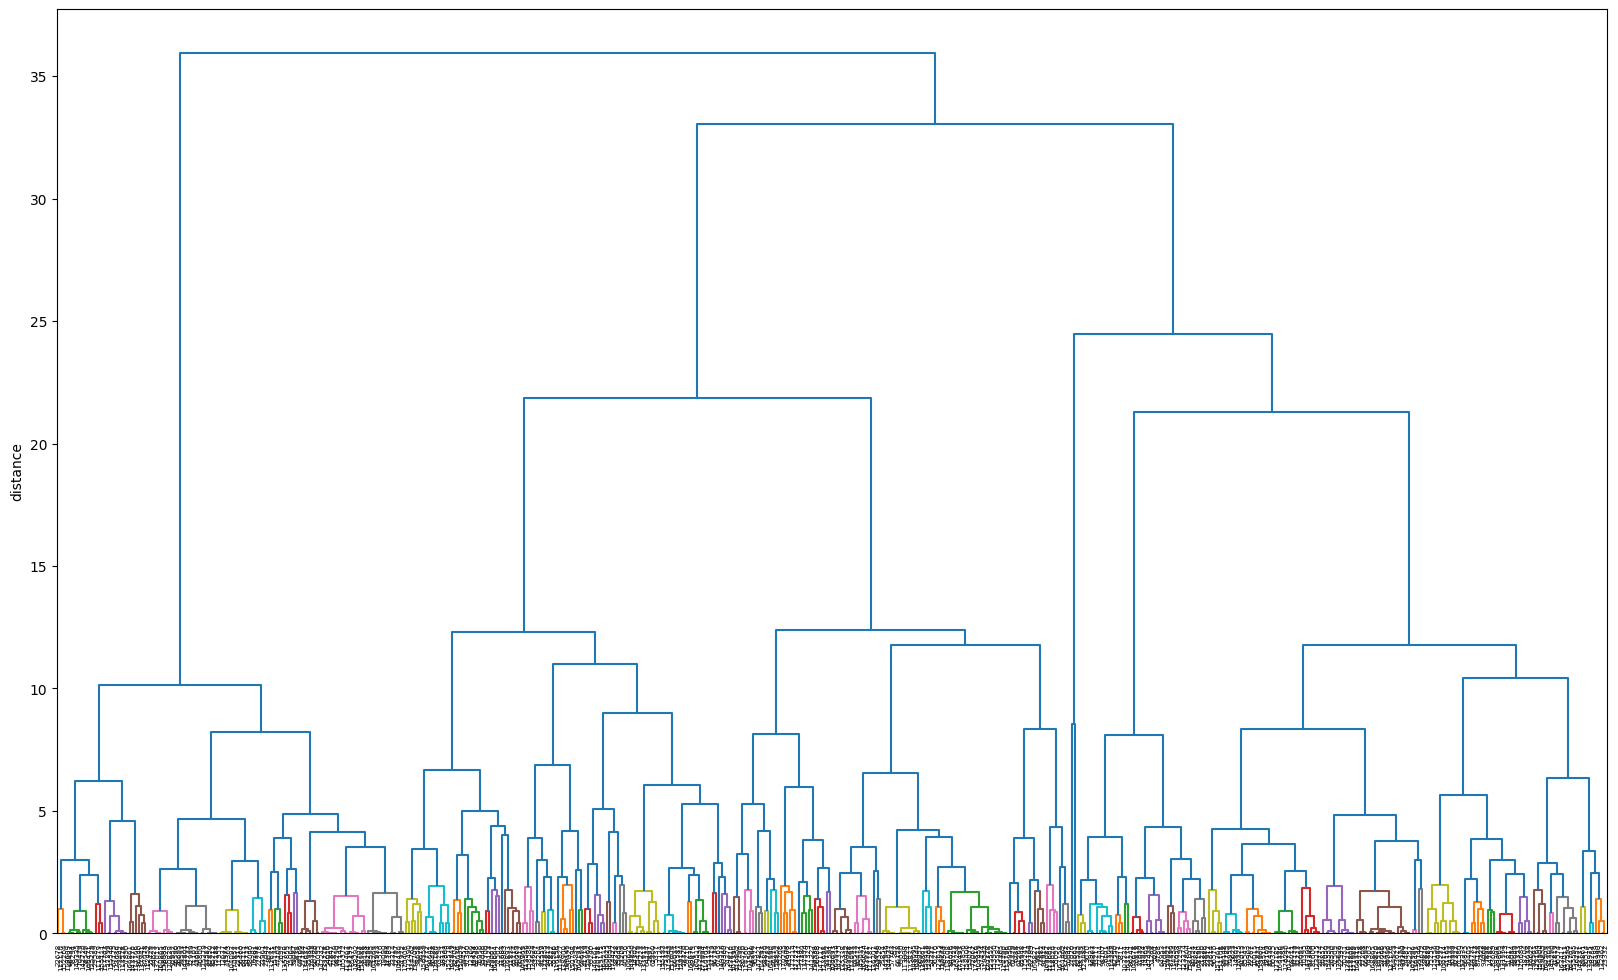

In [299]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Text(0, 0.5, 'distance')

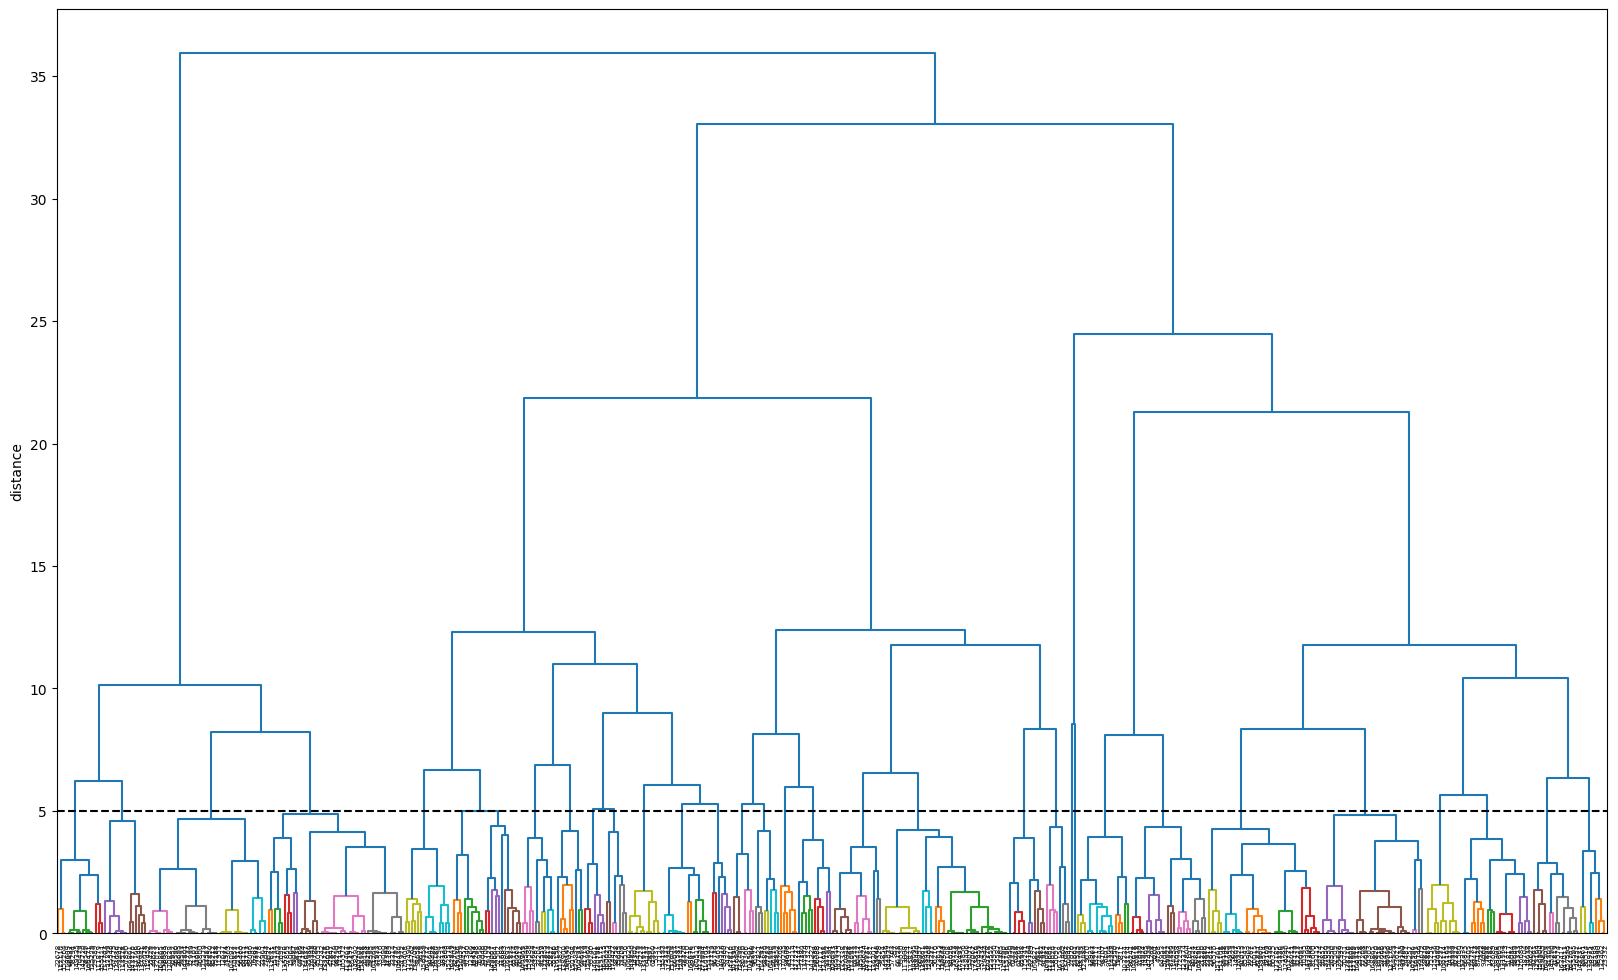

In [300]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5, color='k', linestyle='--')
ax.set_ylabel('distance')

In [301]:
y_pred

array([2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 3, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,

In [302]:
from sklearn.metrics import silhouette_score

# Hierarchical clustering
def hierarchical_clustering_silhouette(scaled_df, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, labels)
    return silhouette_avg

# Evaluate silhouette score for different numbers of clusters
for n_clusters in range(2, 13):
    silhouette_avg = hierarchical_clustering_silhouette(sample, n_clusters)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.20258568040649078
For n_clusters = 3, the average silhouette_score is : 0.2192347596674336
For n_clusters = 4, the average silhouette_score is : 0.22222513740383226
For n_clusters = 5, the average silhouette_score is : 0.21574119320133928
For n_clusters = 6, the average silhouette_score is : 0.23075221710908378
For n_clusters = 7, the average silhouette_score is : 0.21809895620250935
For n_clusters = 8, the average silhouette_score is : 0.21877644180517614
For n_clusters = 9, the average silhouette_score is : 0.21048447755675595
For n_clusters = 10, the average silhouette_score is : 0.21622961042482092
For n_clusters = 11, the average silhouette_score is : 0.2262511138097289
For n_clusters = 12, the average silhouette_score is : 0.22137579087140033


est Score: 0.2526 at k = 4.

Scores drop noticeably after k=5, suggesting over-clustering.

Scores near k=9–12 are lower and flatter, meaning no real gain in cluster quality.

In [303]:
from sklearn.cluster import AgglomerativeClustering



hc = AgglomerativeClustering(
    n_clusters=4,          # Number of clusters based on dendrogram
       metric='euclidean',  # Distance metric
    linkage='ward'         # Linkage criteria (minimizes variance within clusters)
)
y_pred_her = hc.fit_predict(sample)

In [304]:
y_pred_her

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 3, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1,

In [305]:
from sklearn.cluster import KMeans

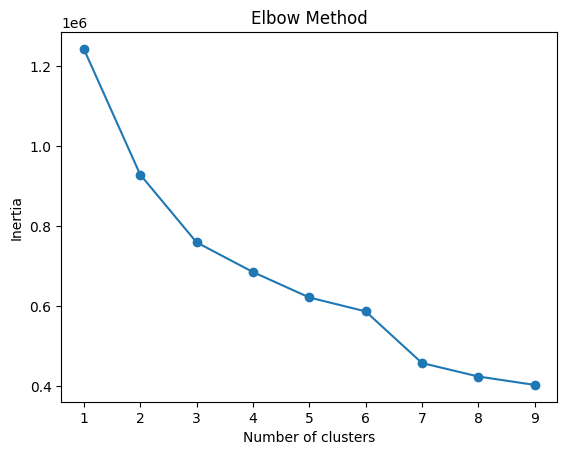

In [306]:
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


let's fit it around 4 cluster.

In [307]:
kmeans = KMeans(n_clusters=4).fit(X_scaled)

In [308]:
y_pred_kmean=kmeans.labels_

In [309]:
df['cluster']=y_pred_kmean

In [310]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience_year,designation,class,tier,cluster
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,9.0,2,1,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,7.0,3,3,3,0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,10.0,2,2,2,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,8.0,3,3,3,0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,8.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
177523,vuurt xzw,2008.0,220000,others,2019.0,17.0,2,3,3,2
177524,husqvawgb,2017.0,500000,others,2020.0,8.0,3,3,3,0
177525,vwwgrxnt,2021.0,700000,others,2021.0,4.0,2,3,3,0
177526,zgn vuurxwvmrt,2019.0,5100000,others,2019.0,6.0,1,1,1,1


In [311]:
df['cluster'].value_counts()

,count
cluster,
0,66061
1,63266
2,46984
3,1217



Hierarchical clustering was applied to a subset of the dataset.

Implemented K-means clustering with the optimal number of clusters. Data points were successfully segmented into compact, well-separated clusters.
Used to determine the optimal number of clusters for K-means. The elbow point was found at k = 4 to 5, showing where adding more clusters gave diminishing returns.


Clear salary-based segmentation was observed.

Employees clustered by years of experience and company tier.

Some companies consistently placed most employees in higher-paying clusters, indicating robust pay scales.

A group of employees consistently falls into low-salary clusters regardless of experience, hinting at pay disparity or undervalued roles.